## Part I: Logistic Regression Model 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import streamlit as sl
import matplotlib.pyplot as plt

#### 1. Read in the data, call the dataframe "s"  and check the dimensions of the dataframe


In [2]:
s=pd.read_csv('social_media_usage.csv')

#### 2. Define a function called clean_sm that takes one input, x, and uses `np.where` to check whether x is equal to 1. If it is, make the value of x = 1, otherwise make it 0. Return x. Create a toy dataframe with three rows and two columns and test your function to make sure it works as expected


In [126]:
def clean_sm(x):
    return np.where(x == 1, 1, 0)
data = {
    'col1': [1, 5, 1],
    'col2': [4,5,1]
}
df = pd.DataFrame(data)

df_cleaned = df.map(clean_sm)

print("\nOriginal DataFrame:\n")
print(df,'\n')
print("\nCleaned DataFrame:\n")
print(df_cleaned,'\n')


Original DataFrame:

   col1  col2
0     1     4
1     5     5
2     1     1 


Cleaned DataFrame:

   col1  col2
0     1     0
1     0     0
2     1     1 



#### 3. Create a new dataframe called "ss". The new dataframe should contain a target column called sm_li which should be a binary variable ( that takes the value of 1 if it is 1 and 0 otherwise (use clean_sm to create this) which indicates whether or not the individual uses LinkedIn, and the following features: income (ordered numeric from 1 to 9, above 9 considered missing), education (ordered numeric from 1 to 8, above 8 considered missing), parent (binary), married (binary), female (binary), and age (numeric, above 98 considered missing). Drop any missing values. Perform exploratory analysis to examine how the features are related to the target.

In [70]:
ss=pd.DataFrame()
ss['sm_li']=s['web1h'].apply(lambda x: x if x not in ('8','9') else float('nan'))
ss['income']=s['income'].apply(lambda x: x if x <98 else float('nan'))
ss['is_parent']=s['par'].apply(lambda x: x if x <8 else float('nan'))
ss['is_married']=s['marital'].apply(lambda x: x if x <8 else float('nan'))
ss['educ2']=s['educ2'].apply(lambda x: x if x <98 else float('nan'))
ss['is_female']=s['gender'].apply(lambda x: x if x < 98 else float('nan'))
ss['age_years']=s['age'].apply(lambda x: x if x != 98 else float('nan'))
ss=ss.dropna()


ss['sm_li']=ss['sm_li'].apply(clean_sm)
ss['is_parent']=ss['is_parent'].apply(clean_sm)
ss['is_married']=ss['is_married'].apply(clean_sm)
ss['is_female']=ss['is_female'].apply(lambda x: 1 if x == 2 else 0)
ss

,sm_li,income,is_parent,is_married,educ2,is_female,age_years
0,0,6,0,0,4.0,1,77.0
1,0,5,0,0,3.0,0,59.0
2,0,8,0,1,4.0,1,60.0
3,0,8,0,0,8.0,0,73.0
4,1,7,0,1,8.0,1,65.0
...,...,...,...,...,...,...,...
1497,0,6,1,1,4.0,0,41.0
1498,1,2,0,0,5.0,0,46.0
1499,0,7,0,0,3.0,0,18.0
1500,0,4,0,0,3.0,1,23.0


#### Column Statistics For Cleaned Dataset 

In [71]:
ss.describe()

,sm_li,income,is_parent,is_married,educ2,is_female,age_years
count,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000
mean,0.324675,6.428571,0.237184,0.488038,5.146275,0.422420,52.924129
std,0.468414,2.695475,0.425501,0.500028,1.864547,0.494114,19.815679
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,18.000000
25%,0.000000,4.000000,0.000000,0.000000,3.000000,0.000000,36.000000
50%,0.000000,7.000000,0.000000,0.000000,5.000000,0.000000,55.000000
75%,1.000000,9.000000,0.000000,1.000000,6.000000,1.000000,67.000000
max,1.000000,10.000000,1.000000,1.000000,8.000000,1.000000,99.000000


#### Correlation

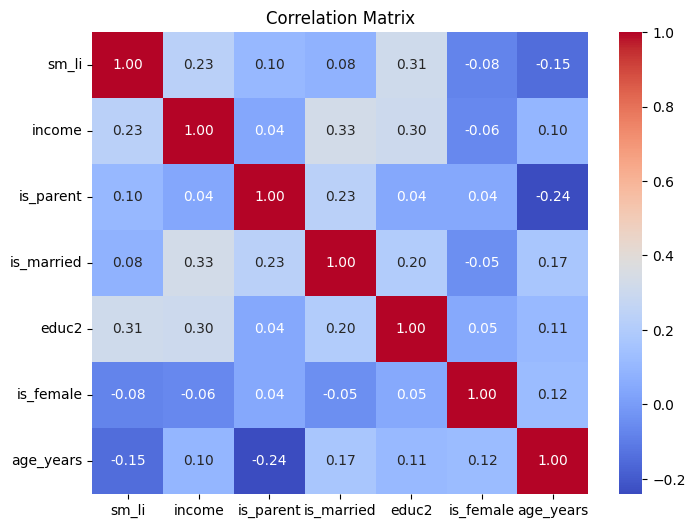

In [79]:
correlation_matrix = ss.corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

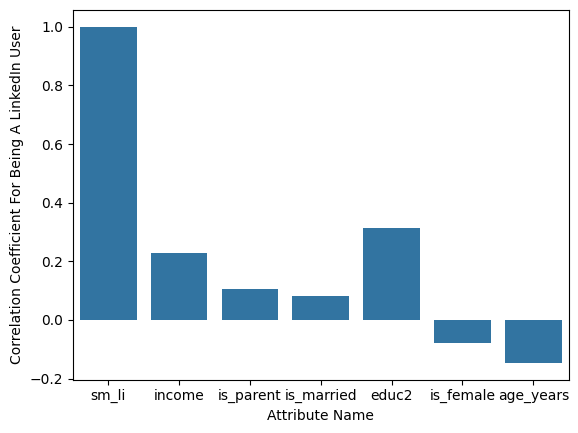

In [119]:
corr_plot_df=pd.DataFrame(correlation_matrix['sm_li']).reset_index(names=['attribute'])
sns.barplot(corr_plot_df,x='attribute',y='sm_li')
plt.xlabel("Attribute Name")
plt.ylabel("Correlation Coefficient For Being A LinkedIn User")

plt.show()

- Income has a moderate positive correlation with being a LinkedIn user, suggesting that higher-income individuals are more likely to use LinkedIn.

- educ2 (education level) also shows a moderate positive correlation, indicating that individuals with higher education levels are more likely to use LinkedIn.

- Other attributes, such as is_parent, is_married, and is_female, have weaker positive correlations, implying these factors are less strongly associated with LinkedIn usage.

- age_years (age) appears to have a slight, negative, correlation indicating that as age increases, LinkedIn usage might decrease slightly.

#### 4. Create a target vector (y) and feature set (X)


In [6]:
y = ss['sm_li'] 
X = ss.drop(columns=['sm_li']) 

#### 5. Split the data into training and test sets. Hold out 20% of the data for testing. Explain what each new object contains and how it is used in machine learning

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

- X_train: This contains the features (input variables) used to train the model. It represents the majority of the dataset, in our case 80% , and is essential for the model to learn patterns and relationships between inputs and outputs.

- X_test: This contains the features (input variables) used to test the model's performance. It represents a smaller portion of the dataset, in our case 20% ```(test_size=0.2)```, and is used to evaluate how well the model generalizes to unseen data.

- y_train: This contains the target values (labels) corresponding to X_train. It is used during training to provide the ground truth so that the model can learn to predict the correct outputs.

- y_test: This contains the target values (labels) corresponding to X_test. It is used to evaluate the accuracy or performance of the model by comparing the model's predictions to the actual values.

#### 6. Initialize a logistic regression model and set class_weight to balanced. Fit the model with the training data.

In [8]:
#Initialize Model
model = LogisticRegression(class_weight='balanced')

In [9]:
#Train model
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

#### 7. Evaluate the model using the testing data. What is the model accuracy for the model? Use the model to make predictions and then generate a confusion matrix from the model. Interpret the confusion matrix and explain what each number means.

In [10]:
#Predict on Test Set
y_pred = model.predict(X_test)

In [48]:
acc_score=accuracy_score(y_test, y_pred)
print(f"Accuracy: ~{round(acc_score*100)}% ( {acc_score} )")

Accuracy: ~65% ( 0.6452702702702703 )


In [11]:
cm=confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix: \n", cm)


Confusion Matrix: 
 [[130  71]
 [ 34  61]]


- 130 represents the number of correctly predicted non-LinkedIn users on the test set.
- 34 represents the number of incorrectly predicted non-LinkedIn users on the test set.

- 61 represents the number of correctly predicted LinkedIn users on the test set.
- 71 represents the number of incorrectly predicted LinkedIn users on the test set.

#### 8. Create the confusion matrix as a dataframe and add informative column names and index names that indicate what each quadrant represents


In [12]:
cm_df=pd.DataFrame(cm,index=["Actual Negative (0)", "Actual Positive (1)"], 
                     columns=["Predicted Negative (0)", "Predicted Positive (1)"])
cm_df

,Predicted Negative (0),Predicted Positive (1)
Actual Negative (0),130,71
Actual Positive (1),34,61


#### 9. Aside from accuracy, there are three other metrics used to evaluate model performance: precision, recall, and F1 score. Use the results in the confusion matrix to calculate each of these metrics by hand. Discuss each metric and give an actual example of when it might be the preferred metric of evaluation. After calculating the metrics by hand, create a classification_report using sklearn and check to ensure your metrics match those of the classification_report.


Precision measures the proportion of true positive predictions out of all positive predictions made by the model and is preferred when false positives have a high cost, such as in spam detection. Recall measures the proportion of true positives out of all actual positives and is critical when false negatives are costly, like in diagnosing life-threatening diseases. The F1 score balances precision and recall and is ideal when the dataset is imbalanced or when both false positives and false negatives have significant consequences. Each metric highlights a specific aspect of model performance, enabling evaluation based on the problem's requirements.




In [14]:
# Confusion matrix values
TP = 61  # True Positives
FP = 71  # False Positives
FN = 34  # False Negatives
TN = 130  # True Negatives
# Calculate precision, recall, and F1 score manually
precision = TP / (TP + FP) 
recall = TP / (TP + FN) 
f1_score = 2 * (precision * recall) / (precision + recall) 
print("\nPrecision (by hand):", precision)
print("\nRecall (by hand):", recall)
print("\nF1 Score (by hand):", f1_score)

#Confirm with classification report
print("\n\nClassification Report (sklearn) :\n", classification_report(y_test, y_pred, target_names=["Is not a LinkedIn user (0)", "Is a LinkedIn user (1)"]))



Precision (by hand): 0.4621212121212121

Recall (by hand): 0.6421052631578947

F1 Score (by hand): 0.5374449339207048


Classification Report (sklearn) :
                             precision    recall  f1-score   support

Is not a LinkedIn user (0)       0.79      0.65      0.71       201
    Is a LinkedIn user (1)       0.46      0.64      0.54        95

                  accuracy                           0.65       296
                 macro avg       0.63      0.64      0.62       296
              weighted avg       0.69      0.65      0.66       296



#### 10. Use the model to make predictions. For instance, what is the probability that a high income (e.g. income=8), with a high level of education (e.g. 7), non-parent who is married female and 42 years old uses LinkedIn? How does the probability change if another person is 82 years old, but otherwise the same?


- Case 1: For the 42 year old woman, she has a ~66% probability of being a LinkedIn user, and a ~34% probability of not being a LinkedinUser

- Case 2: For the 82 year old woman, she has a ~46% probability of being a LinkedIn user, and a ~54% probability of not being a LinkedinUser

We can see that the model is influenced by the age feature in the dataset. When we increase the age of our test subject by 40 years, to 82, the probability of being a LinkedIn user goes down, the model ultimatley classifies this second case as a non-user, but we also see a higher opposite class probability than we did for the 42 year old, indicating that while the model is predicting the 82 year old to be a non-LinkedIn user, it has a lower level of certainty than that of the prediction of the 42 year old.

In [49]:
case_1=pd.DataFrame(model.predict_proba(pd.DataFrame([{
  'income': 8,
  'is_parent': 0,
  'is_married': 1,
  'educ2': 7.0,
  'is_female': 1,
  'age_years': 42.0
}])), columns=['Negative Class Probability','Positive Class Probability'],index=['Case 1'])
case_2=pd.DataFrame(model.predict_proba(pd.DataFrame([{
  'income': 8,
  'is_parent': 0,
  'is_married': 1,
  'educ2': 7.0,
  'is_female': 1,
  'age_years': 82.0
}])), columns=['Negative Class Probability','Positive Class Probability'],index=['Case 2'])
pd.concat([case_1,case_2])

,Negative Class Probability,Positive Class Probability
Case 1,0.341735,0.658265
Case 2,0.536287,0.463713


## Part II: Streamlit Prediction App

In [18]:
sl.title("LinkedIn Usage Predictor")
sl.write("Enter your information below to predict if you are likely to be a LinkedIn user and see the probability.")


income = sl.slider("Income Level (1-10)", min_value=1, max_value=10, value=5)
is_parent = sl.radio("Are you a parent?", options=[0, 1], format_func=lambda x: "No" if x == 0 else "Yes")
is_married = sl.radio("Are you married?", options=[0, 1], format_func=lambda x: "No" if x == 0 else "Yes")
educ2 = sl.slider("Education Level (1-8)", min_value=1, max_value=8, value=4)
is_female = sl.radio("Gender", options=[0, 1], format_func=lambda x: "Male" if x == 0 else "Female")
age_years = sl.number_input("Age (in years)", min_value=1, max_value=120, value=30)


user_input = pd.DataFrame([{
    'income': income,
    'is_parent': is_parent,
    'is_married': is_married,
    'educ2': educ2,
    'is_female': is_female,
    'age_years': age_years
}])
probabilities = model.predict_proba(user_input)[0]
prediction = model.predict(user_input)[0]


sl.subheader("Prediction Result")
sl.write("You are classified as a LinkedIn user." if prediction == 1 else "You are classified as not a LinkedIn user.")

sl.subheader("Probability")
sl.write(f"Probability of LinkedIn usage: {probabilities[1]:.2%}")
sl.write(f"Probability of not using LinkedIn: {probabilities[0]:.2%}")


sl.subheader("Model Performance")
y_pred = model.predict(X_test)
sl.write("Classification Report:")
sl.table(pd.DataFrame(classification_report(y_test, y_pred, target_names=["Not a LinkedIn user (0)", "LinkedIn user (1)"],output_dict=True)))
